# Introduzione
<hr>

# Indice
<h3>

1. Data visualization

2. Pre-processing

3. Modelli di classificazione

4. Prestazioni dei classificatori

4. Conclusioni


<hr>

# 1. Data visualization

In [160]:
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
import warnings


import numpy as np
import pandas as ps

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)
target_feature='round_winner'
warnings.filterwarnings('ignore')
Encoder_df = LabelEncoder() 

ps.set_option('display.max_rows', None)  # or 1000


In [161]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [162]:
def plot_distributions(features):
    for i in features:
        if ds[i].value_counts().shape[0]>20:
    
            plt.figure(figsize=(12,8))
            sns.distplot(ds[i][ds[target_feature]==0],hist=False,color='g', label='CT')
            _=sns.distplot(ds[i][ds[target_feature]==1],hist=False,color='r',label='T',)
            plt.legend()
            plt.show()              
        else:
            plt.figure(figsize=(14, 6))
            sns.countplot(x=i, hue=target_feature, data=ds, palette='coolwarm')
            plt.legend(loc='upper right')
            plt.yscale('log')
            plt.xticks(rotation=45)
            plt.show()

def plot_based_on(x,y,data,title):
    plt.figure(figsize=(15,7))
    p = sns.barplot(x = x, y = y, data = data)
    p = plt.xticks(rotation=90)
    plt.title(title, size=20)

In [163]:
file_name = "csgo_round_snapshots.csv"
ds = ps.read_csv(file_name)
ds[target_feature] = Encoder_df.fit_transform(ds[target_feature])
ds.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


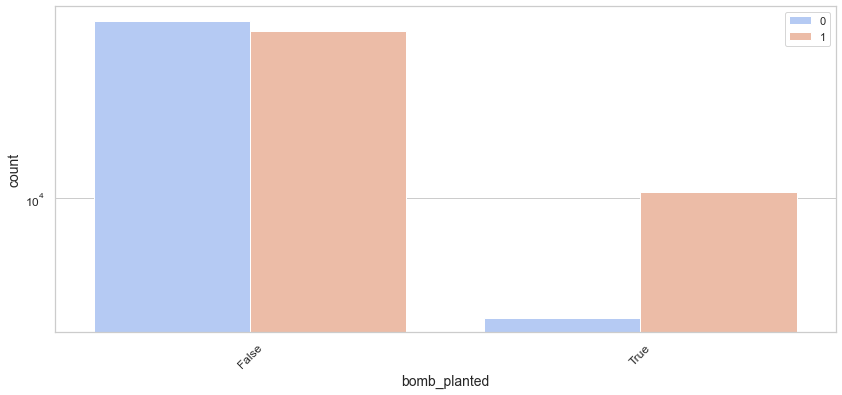

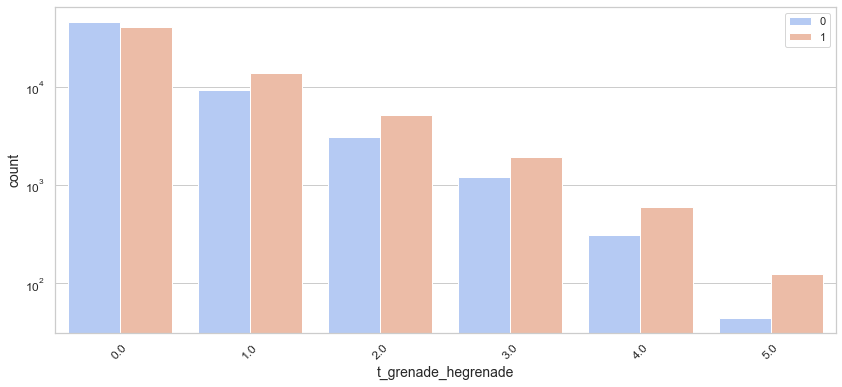

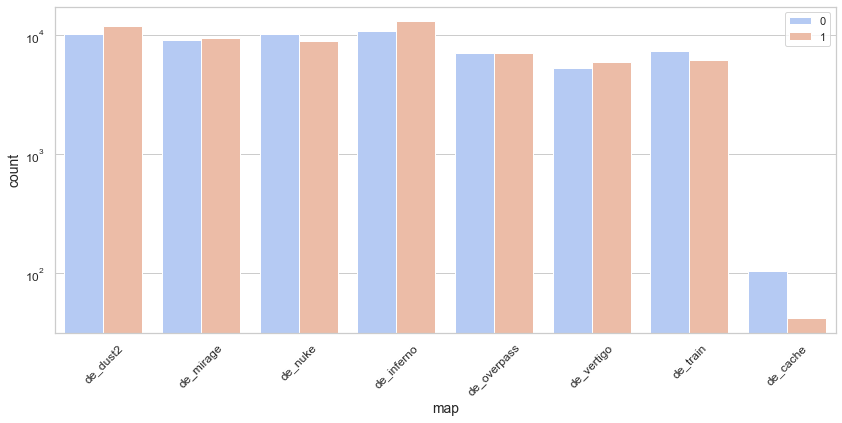

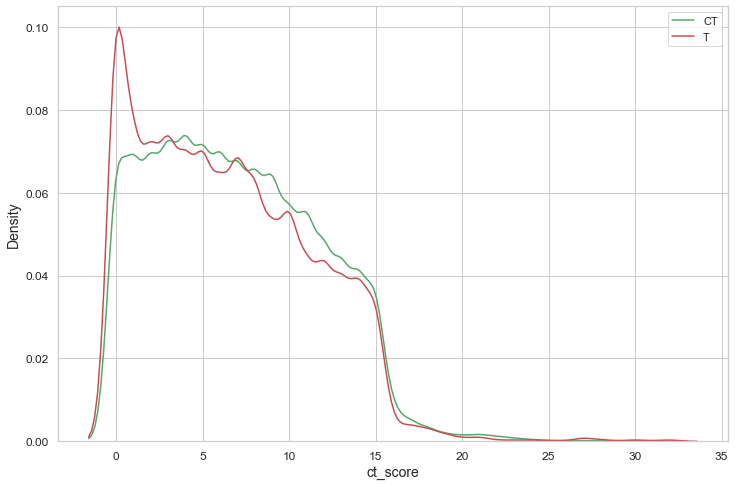

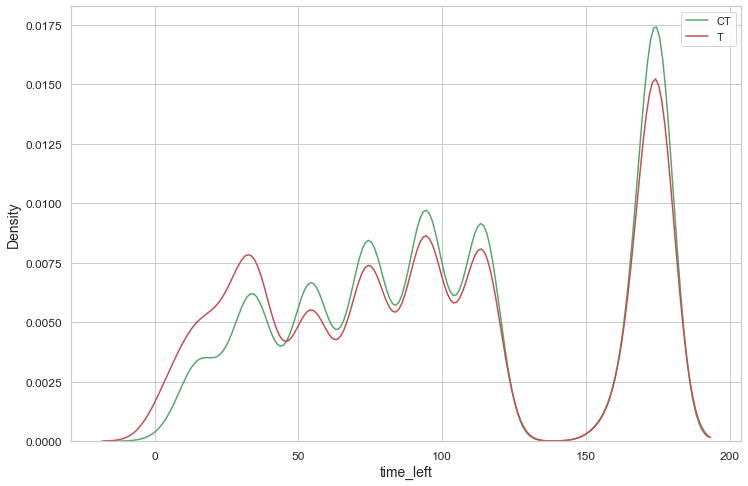

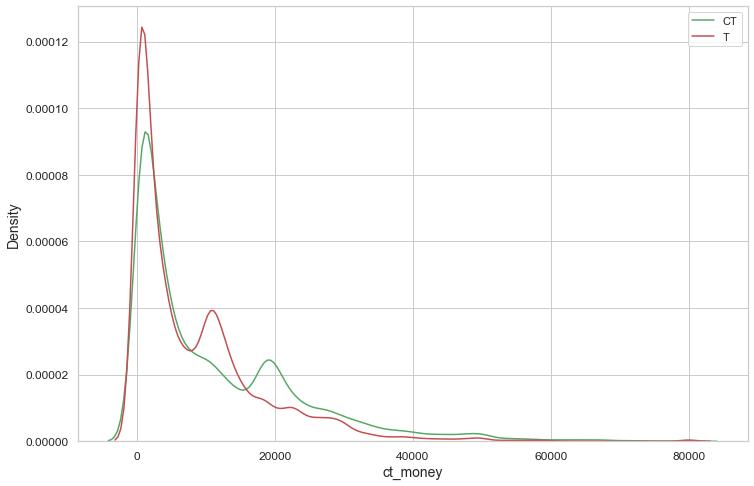

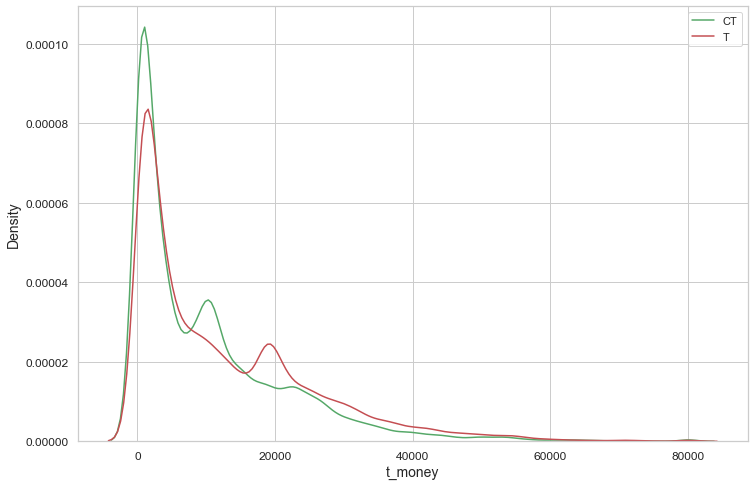

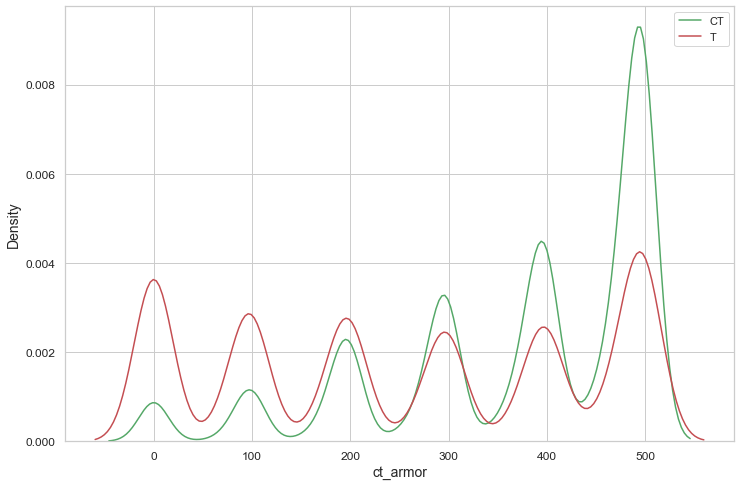

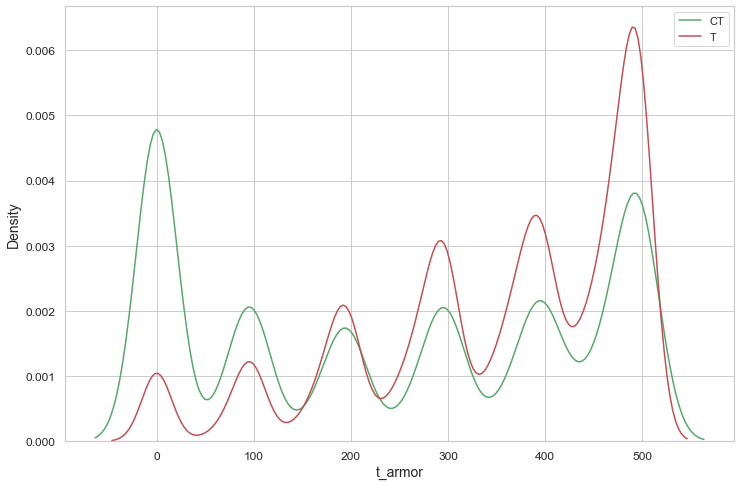

In [164]:
important=['bomb_planted' ,'t_grenade_hegrenade', 'map' ,'ct_score', 'time_left',
 'ct_money', 't_money' ,'ct_armor', 't_armor']
plot_distributions(important)

In [165]:
ds.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [166]:
import re
weapons=['ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova',
       'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver',
       't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff',
       'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553',
       't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08',
       'ct_weapon_ump45', 't_weapon_ump45', 'ct_weapon_xm1014',
       't_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle',
       'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_usps',
       't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 'ct_weapon_p2000',
       't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9',
       'ct_grenade_hegrenade', 't_grenade_hegrenade', 'ct_grenade_flashbang',
       't_grenade_flashbang', 'ct_grenade_smokegrenade',
       't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade',
       't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade',
       't_grenade_molotovgrenade', 'ct_grenade_decoygrenade',
       't_grenade_decoygrenade']

ct_weapon=[]
ct_utilities=[]
t_utilities=[]
t_weapon=[]
rexex='^t'
for w in weapons:
       if(w=='ct_weapon_usps' or w=='t_weapon_glock'):
              continue
       if re.search(rexex,w):
              if w.__contains__('grenade'):
                     t_utilities.append(w)
              else:
                     t_weapon.append(w)
       else:
              if w.__contains__('grenade'):
                     ct_utilities.append(w)
              else:
                     ct_weapon.append(w)

In [167]:
def plot_weapon(weapons):
    plt.figure(figsize=(20,10))
    tmp=ds[weapons].sum().sort_values(ascending=False)
    tmp2=ps.DataFrame(tmp,columns=['value'])
    tmp2['weapon']=tmp2.index
    tmp2=tmp2[tmp2['value']>1500]
    p = sns.barplot(x = tmp2['weapon'], y = tmp2['value'])
    p = plt.xticks(rotation=90)
    plt.title("Weapon usage", size=20)


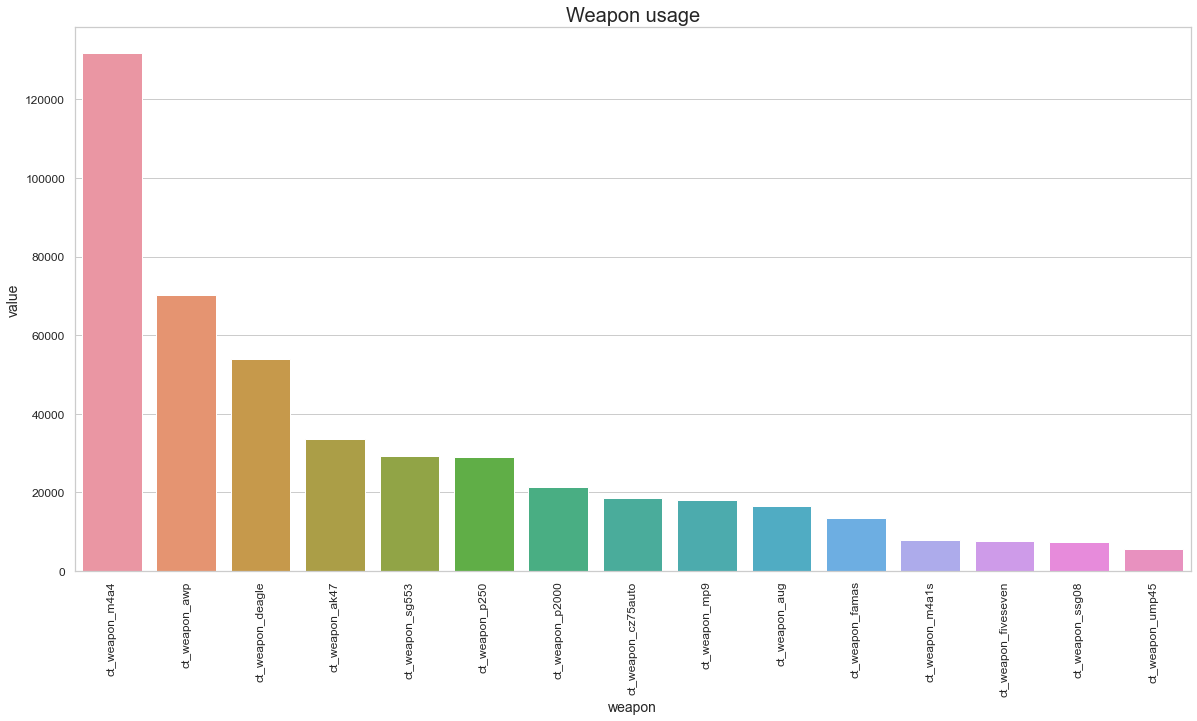

In [168]:
plot_weapon(ct_weapon)

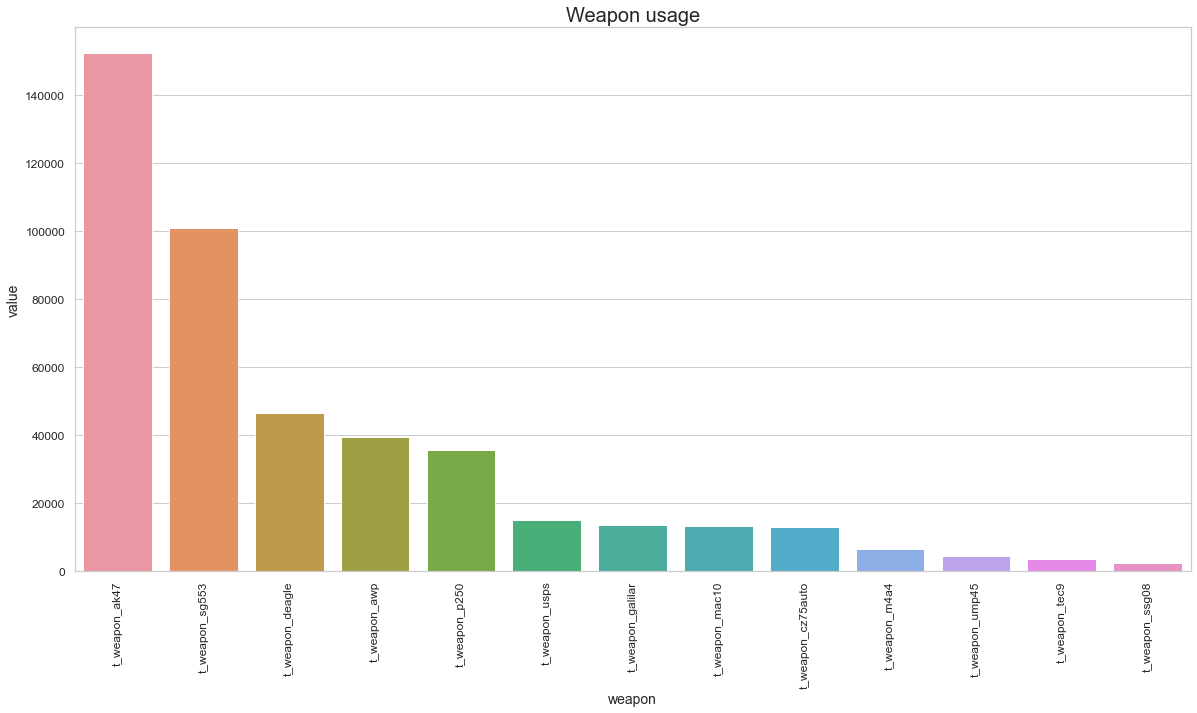

In [169]:
plot_weapon(t_weapon)

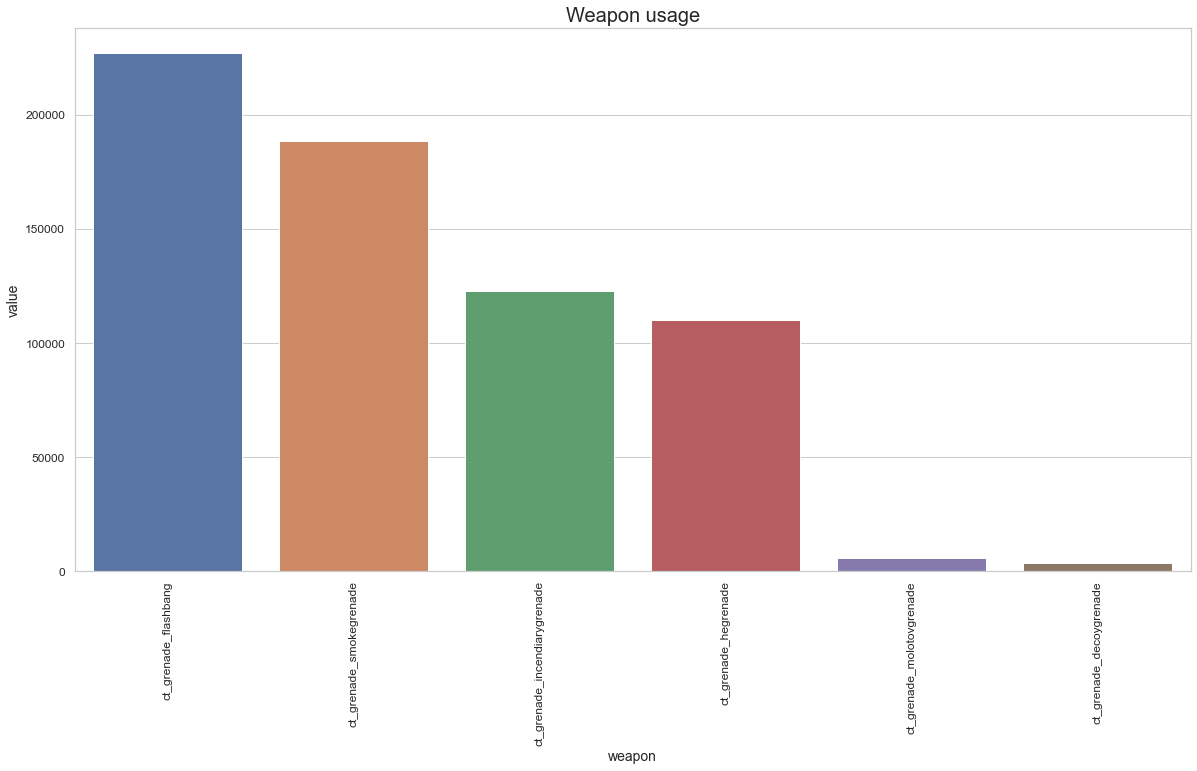

In [170]:
plot_weapon(ct_utilities)

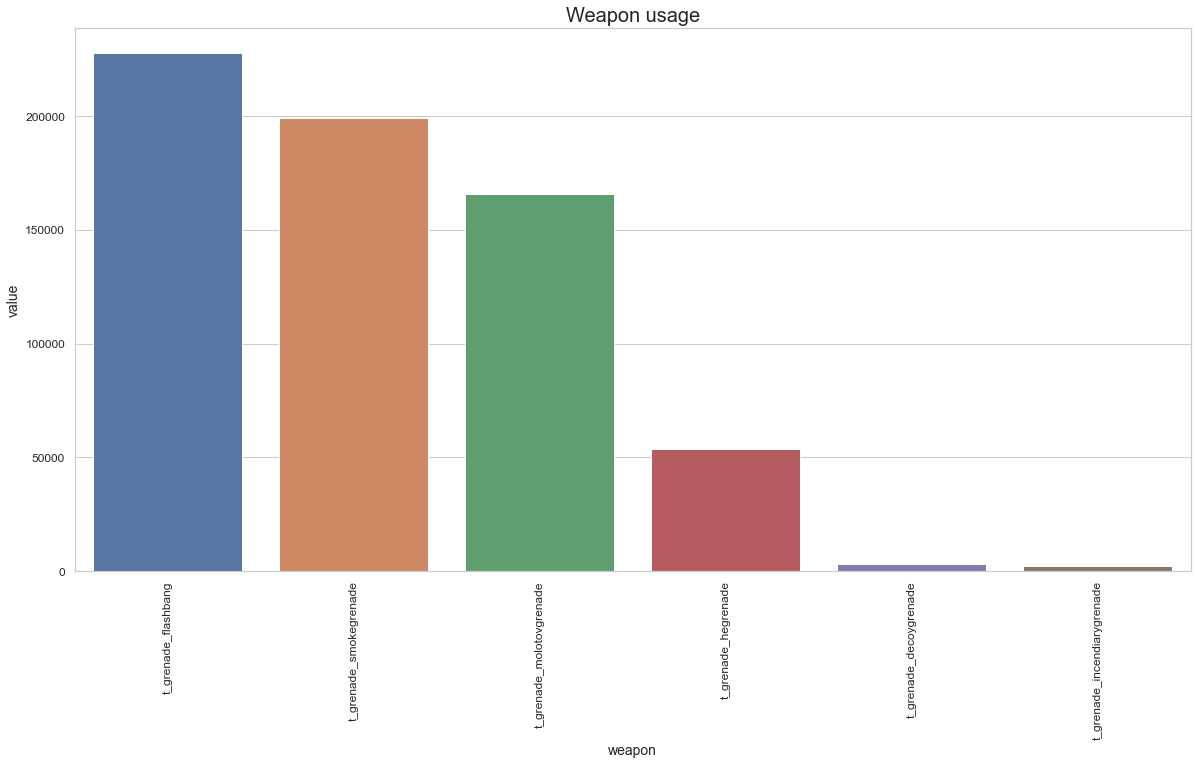

In [171]:
plot_weapon(t_utilities)

[657433. 651364.]


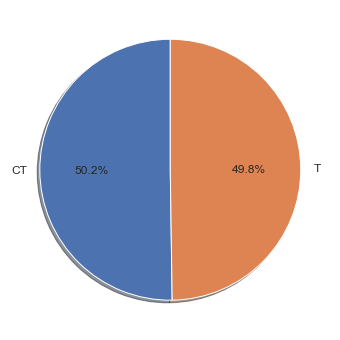

In [172]:
plt.figure(figsize=(6,6))
total_utilities_ct=ds[ct_utilities].sum()
total_utilities_t=ds[t_utilities].sum()
values=[total_utilities_ct.values.sum(),total_utilities_t.values.sum()]
labels=['CT','T']
y=np.array(values)
print(y)
plt.pie(y, labels = labels,autopct='%1.1f%%',explode=[0,0],shadow=True, startangle=90)
plt.show() 


[470739. 451666.]


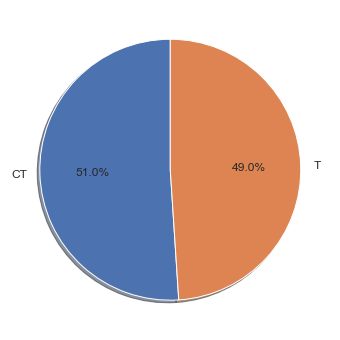

In [173]:
plt.figure(figsize=(6,6))
total_utilities_ct=ds[ct_weapon].sum()
total_utilities_t=ds[t_weapon].sum()
values=[total_utilities_ct.values.sum(),total_utilities_t.values.sum()]
labels=['CT','T']
y=np.array(values)
print(y)
plt.pie(y, labels = labels,autopct='%1.1f%%',explode=[0,0],shadow=True, startangle=90)
plt.show() 

[1.1982744e+09 1.3760153e+09]


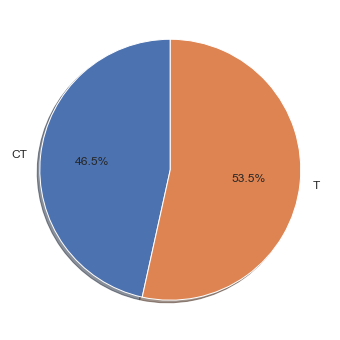

In [174]:
plt.figure(figsize=(6,6))
total_money_ct=ds['ct_money'].sum()

total_money_t=ds['t_money'].sum()
values=[total_money_ct,total_money_t]
labels=['CT','T']
y=np.array(values)
print(y)
plt.pie(y, labels = labels,autopct='%1.1f%%',explode=[0,0],shadow=True, startangle=90)
plt.show() 

<AxesSubplot:xlabel='time'>

<Figure size 1440x1440 with 0 Axes>

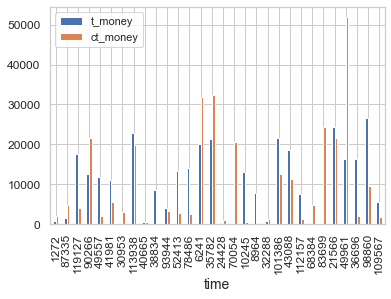

In [177]:
plt.figure(figsize=(20,20))
ds1=ds
ds1['time']=ds1.index
ds1=ds1.sample(30)
ds1.plot(x='time',y=['t_money','ct_money'],kind='bar')

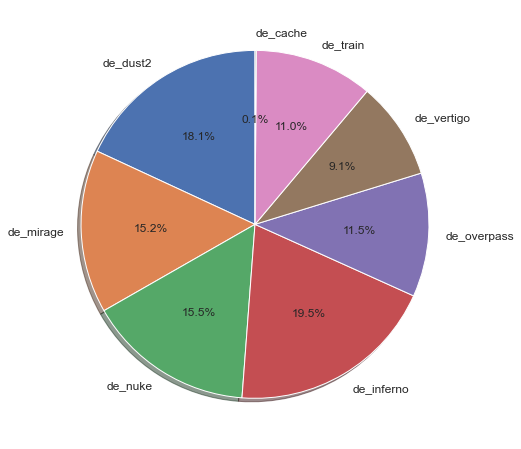

In [145]:
plt.figure(figsize=(8,8))
values=[]
labels=ds['map'].unique()
for x in labels:
    values.append((ds[ds['map']==x].shape[0]))
y=np.array(values)
explode=np.zeros(labels.shape[0])

plt.pie(y, labels = labels,autopct='%1.1f%%',explode=explode,shadow=True, startangle=90)
plt.show() 

In [18]:
ds['t_weapon_awp'].sum()

39317.0

In [18]:

from pandas.api.types import is_numeric_dtype

for c in ds.columns:
    if not(is_numeric_dtype(ds[c])) :
        ds[c] = Encoder_df.fit_transform(ds[c])

ds.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


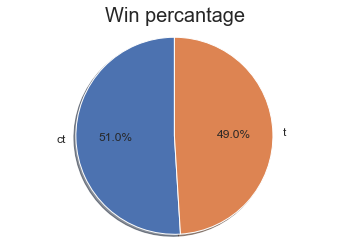

In [19]:
plt.figure(figsize=(6,6))
labels = 'CT','T'
sizes = ds[target_feature].value_counts()
explode = (0, 0)  

fig1, ax1 = plt.subplots()
p = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Win percantage", size=20)
plt.show()

In [20]:
ds.describe()

,time_left,ct_score,t_score,map,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,3.520170,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,...,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750,0.509811
std,54.465238,4.790362,4.823543,1.929088,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,...,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162,0.499906
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,2.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,3.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,166.917500,10.000000,10.000000,5.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
max,175.000000,32.000000,33.000000,7.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,...,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000,1.000000


<hr>

# 2. Pre-processing

In [21]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  int32  
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [22]:
ds.isnull().sum().sort_values(ascending=False)

time_left                       0
t_weapon_mp7                    0
t_weapon_xm1014                 0
ct_weapon_xm1014                0
t_weapon_ump45                  0
ct_weapon_ump45                 0
t_weapon_ssg08                  0
ct_weapon_ssg08                 0
t_weapon_sg553                  0
ct_weapon_sg553                 0
t_weapon_scar20                 0
ct_weapon_scar20                0
t_weapon_sawedoff               0
ct_weapon_sawedoff              0
t_weapon_r8revolver             0
ct_weapon_r8revolver            0
t_weapon_p90                    0
ct_weapon_p90                   0
t_weapon_nova                   0
ct_weapon_nova                  0
t_weapon_negev                  0
ct_weapon_negev                 0
t_weapon_mp9                    0
ct_weapon_deagle                0
t_weapon_deagle                 0
ct_weapon_fiveseven             0
ct_grenade_flashbang            0
t_grenade_decoygrenade          0
ct_grenade_decoygrenade         0
t_grenade_molo

In [23]:
ds=remove_collinear_features(ds,0.6)

t_score | ct_score | 0.63
ct_health | time_left | 0.68
ct_health | bomb_planted | 0.62
t_health | time_left | 0.68
t_health | ct_health | 0.76
ct_helmets | ct_armor | 0.69
t_helmets | t_armor | 0.88
ct_defuse_kits | ct_armor | 0.6
ct_defuse_kits | ct_helmets | 0.77
ct_players_alive | time_left | 0.64
ct_players_alive | bomb_planted | 0.62
ct_players_alive | ct_health | 0.97
ct_players_alive | t_health | 0.7
t_players_alive | ct_health | 0.68
t_players_alive | t_health | 0.96
t_players_alive | ct_players_alive | 0.63
t_weapon_ak47 | t_helmets | 0.67
t_weapon_glock | t_health | 0.64
t_weapon_glock | t_players_alive | 0.65
ct_weapon_usps | ct_health | 0.62
ct_weapon_usps | ct_players_alive | 0.62
ct_grenade_flashbang | ct_armor | 0.73
ct_grenade_flashbang | ct_helmets | 0.73
ct_grenade_flashbang | ct_defuse_kits | 0.7
ct_grenade_flashbang | ct_grenade_hegrenade | 0.7
t_grenade_flashbang | t_armor | 0.74
t_grenade_flashbang | t_helmets | 0.77
ct_grenade_smokegrenade | ct_armor | 0.67
ct_gr

In [24]:
#GESTIONE CLASSI SBILANCIATE

class_count_survived,class_count_dead=ds[target_feature].value_counts()
class_survived=ds[ds[target_feature]==0]
class_dead=ds[ds[target_feature]==1]
print('class ct',class_survived.shape)
print('class t',class_dead.shape)
print(class_count_survived," -- ",class_count_dead)


class ct (60004, 80)
class t (62406, 80)
62406  --  60004


# 3. Modelli di classificazione

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import*

ds_x=ds.drop(target_feature,axis=1)
ds_y=ds[target_feature]
X_train, X_test, y_train, y_test = train_test_split(ds_x,ds_y, random_state=42,stratify=ds_y)

scaler = MinMaxScaler()

normalized_X_train = DataFrame(scaler.fit_transform(X_train))
normalized_X_test = DataFrame(scaler.fit_transform(X_test))


## 3.1 Random forest


In [26]:
from sklearn.ensemble import RandomForestClassifier

rnd_class = RandomForestClassifier(n_estimators=40, n_jobs=-1, random_state=42)
rnd_class.fit(X_train,y_train)
y_rnd_pred = rnd_class.predict(X_test)

print(classification_report(y_test,y_rnd_pred))


              precision    recall  f1-score   support

           0       0.87      0.90      0.88     15001
           1       0.90      0.87      0.88     15602

    accuracy                           0.88     30603
   macro avg       0.88      0.88      0.88     30603
weighted avg       0.88      0.88      0.88     30603



In [27]:
confusion_matrix(y_test,y_rnd_pred)

array([[13434,  1567],
       [ 2023, 13579]], dtype=int64)

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(rnd_class, X_train, y_train, cv=5, scoring="accuracy")
cross_val_scores.mean()

0.868103691459087

## 3.2 K-neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

kneighbors_class = KNeighborsClassifier()
kneighbors_class.fit(normalized_X_train,y_train)
y_kneighbors_pred = kneighbors_class.predict(normalized_X_test)

print(classification_report(y_test,y_kneighbors_pred))
print(f1_score(y_test,y_kneighbors_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     15001
           1       0.83      0.83      0.83     15602

    accuracy                           0.82     30603
   macro avg       0.82      0.82      0.82     30603
weighted avg       0.82      0.82      0.82     30603

0.8263657348037958


## 3.3 SGD

In [30]:
standard_scaler = StandardScaler()

scaled_X_train = DataFrame(standard_scaler.fit_transform(X_train))
scaled_X_test = DataFrame(standard_scaler.fit_transform(X_test))


sgd_class = SGDClassifier(max_iter=1000, tol=1e-3)
clf = sgd_class.fit(scaled_X_train,y_train)
y_sgd_pred = sgd_class.predict(scaled_X_test)
print(classification_report(y_test,y_sgd_pred))
print(f1_score(y_test,y_sgd_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73     15001
           1       0.73      0.75      0.74     15602

    accuracy                           0.73     30603
   macro avg       0.73      0.73      0.73     30603
weighted avg       0.73      0.73      0.73     30603

0.7435451758682805


## 3.4 Decision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_class = DecisionTreeClassifier()
decision_tree_class.fit(X_train,y_train)
y_decision_tree_pred = decision_tree_class.predict(X_test)
print(classification_report(y_test,y_decision_tree_pred))
print(f1_score(y_test,y_decision_tree_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     15001
           1       0.83      0.82      0.83     15602

    accuracy                           0.82     30603
   macro avg       0.82      0.82      0.82     30603
weighted avg       0.82      0.82      0.82     30603

0.8255072463768115


## 3.5 Ada boost

In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_class = AdaBoostClassifier(n_estimators=50, random_state=0)
ada_boost_class.fit(X_train,y_train)
y_ada_boost_pred = ada_boost_class.predict(X_test)
print(classification_report(y_test,y_ada_boost_pred))
print(f1_score(y_test,y_ada_boost_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74     15001
           1       0.75      0.74      0.74     15602

    accuracy                           0.74     30603
   macro avg       0.74      0.74      0.74     30603
weighted avg       0.74      0.74      0.74     30603

0.7423552584842907


## 4. Prestazioni dei classificatori

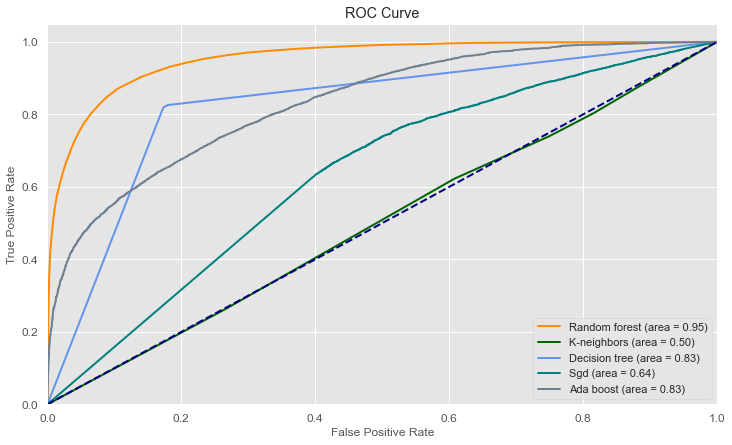

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

rnd_class_predict_probabilities = rnd_class.predict_proba(X_test)[:,1]
rnd_fpr, rnd_tpr, _ = roc_curve(y_test, rnd_class_predict_probabilities)
rnd_class_roc_auc = auc(rnd_fpr, rnd_tpr)

kneighbors_class_predict_probabilities = kneighbors_class.predict_proba(X_test)[:,1]
kneighbors_fpr, kneighbors_tpr, _ = roc_curve(y_test, kneighbors_class_predict_probabilities)
kneighbors_class_roc_auc = auc(kneighbors_fpr, kneighbors_tpr)


calibrator = CalibratedClassifierCV(clf, cv='prefit')
model = calibrator.fit(scaled_X_train, y_train)

sgd_class_predict_probabilities = model.predict_proba(X_test)[:,1]
sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_class_predict_probabilities)
sgd_class_roc_auc = auc(sgd_fpr, sgd_tpr)

decision_tree_class_predict_probabilities = decision_tree_class.predict_proba(X_test)[:,1]
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_class_predict_probabilities)
decision_tree_class_roc_auc = auc(decision_tree_fpr, decision_tree_tpr)

decision_tree_class_predict_probabilities = decision_tree_class.predict_proba(X_test)[:,1]
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_class_predict_probabilities)
decision_tree_class_roc_auc = auc(decision_tree_fpr, decision_tree_tpr)
       
ada_boost_class_predict_probabilities = ada_boost_class.predict_proba(X_test)[:,1]
ada_boost_fpr, ada_boost_tpr, _ = roc_curve(y_test, ada_boost_class_predict_probabilities)
ada_boost_class_roc_auc = auc(ada_boost_fpr, ada_boost_tpr)


plt.figure(figsize=(12, 7))
plt.plot(rnd_fpr, rnd_tpr, color='darkorange',
         lw=2, label='Random forest (area = %0.2f)' % rnd_class_roc_auc)
plt.plot(kneighbors_fpr, kneighbors_tpr, color='darkgreen',
         lw=2, label='K-neighbors (area = %0.2f)' % kneighbors_class_roc_auc)
plt.plot(decision_tree_fpr, decision_tree_tpr, color='cornflowerblue',
         lw=2, label='Decision tree (area = %0.2f)' % decision_tree_class_roc_auc)
plt.plot(sgd_fpr, sgd_tpr, color='teal',
         lw=2, label='Sgd (area = %0.2f)' % sgd_class_roc_auc)
plt.plot(ada_boost_fpr, ada_boost_tpr, color='slategrey',
         lw=2, label='Ada boost (area = %0.2f)' % ada_boost_class_roc_auc)
         
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Accuracy')

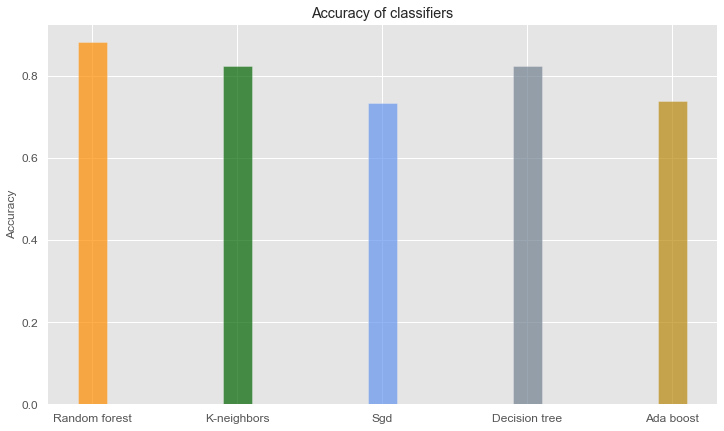

In [34]:
classifier_names = ['Random forest','K-neighbors','Sgd','Decision tree', 'Ada boost']
classifier_accuracies = [accuracy_score(y_test,y_rnd_pred), accuracy_score(y_test,y_kneighbors_pred), 
                         accuracy_score(y_test,y_sgd_pred), accuracy_score(y_test,y_decision_tree_pred), 
                         accuracy_score(y_test,y_ada_boost_pred)]

plt.figure(figsize=(12,7))
plt.bar(classifier_names, classifier_accuracies, width=0.2, color=['darkorange','darkgreen','cornflowerblue','slategrey', 'darkgoldenrod'], alpha=0.7)
plt.title('Accuracy of classifiers')
plt.ylabel('Accuracy')

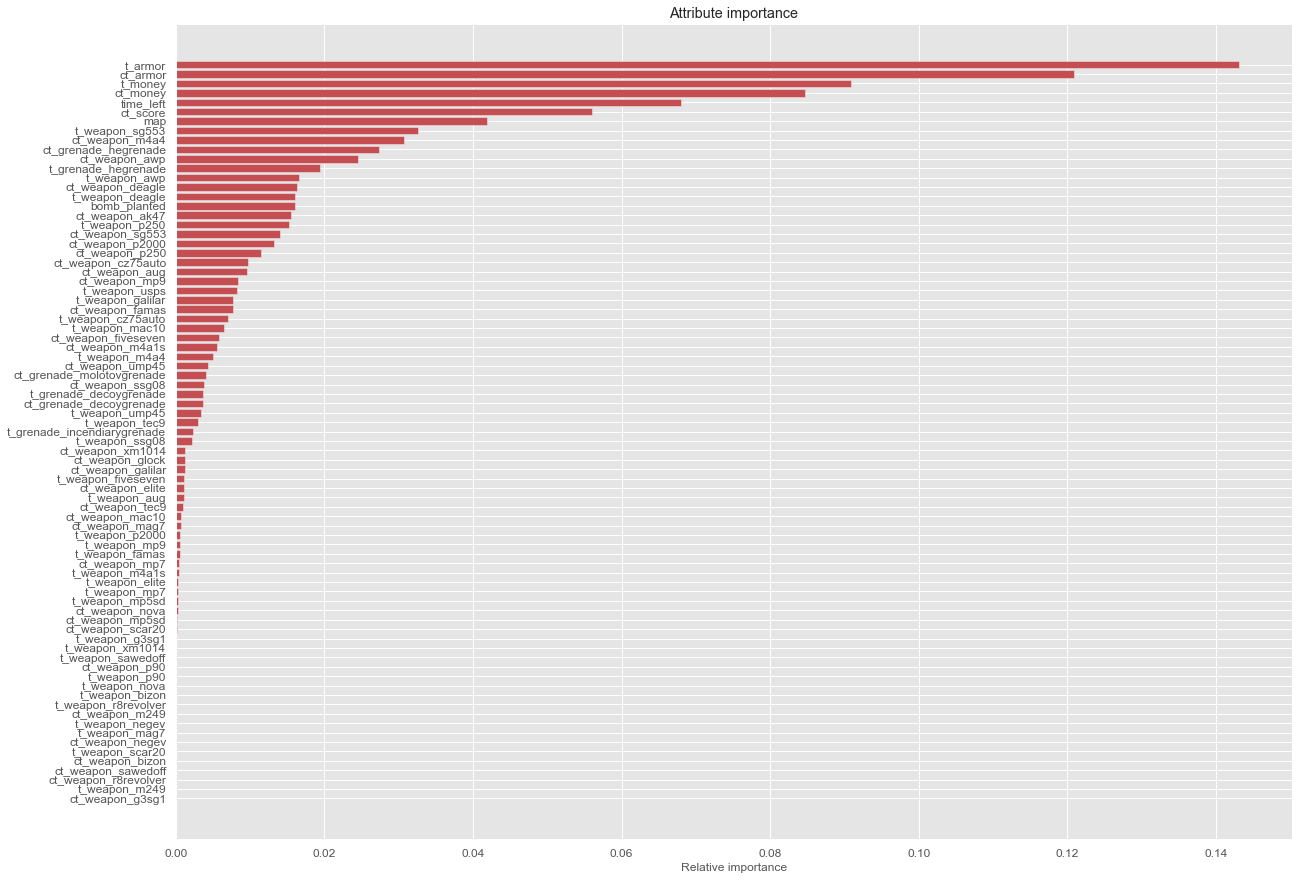

In [35]:
attributes = ds_x.columns
importances = rnd_class.feature_importances_
index = np.argsort(importances)

plt.figure(figsize=(20,15))
plt.title("Attribute importance")
p = plt.barh(range(len(index)), importances[index], color='r', align='center')
plt.yticks(range(len(index)), attributes[index])
plt.xlabel("Relative importance")
plt.show()

In [36]:
threshold = 0.01
valuable = np.extract(importances[index]>threshold,attributes[index])
valuable1= np.concatenate((valuable,[target_feature]))
print(valuable1)

['ct_weapon_p250' 'ct_weapon_p2000' 'ct_weapon_sg553' 't_weapon_p250'
 'ct_weapon_ak47' 'bomb_planted' 't_weapon_deagle' 'ct_weapon_deagle'
 't_weapon_awp' 't_grenade_hegrenade' 'ct_weapon_awp'
 'ct_grenade_hegrenade' 'ct_weapon_m4a4' 't_weapon_sg553' 'map' 'ct_score'
 'time_left' 'ct_money' 't_money' 'ct_armor' 't_armor' 'round_winner']


In [37]:
ds_valuable=ds[valuable1]
ds_valuable.head()
test_under_valuable = ds_valuable[valuable1]

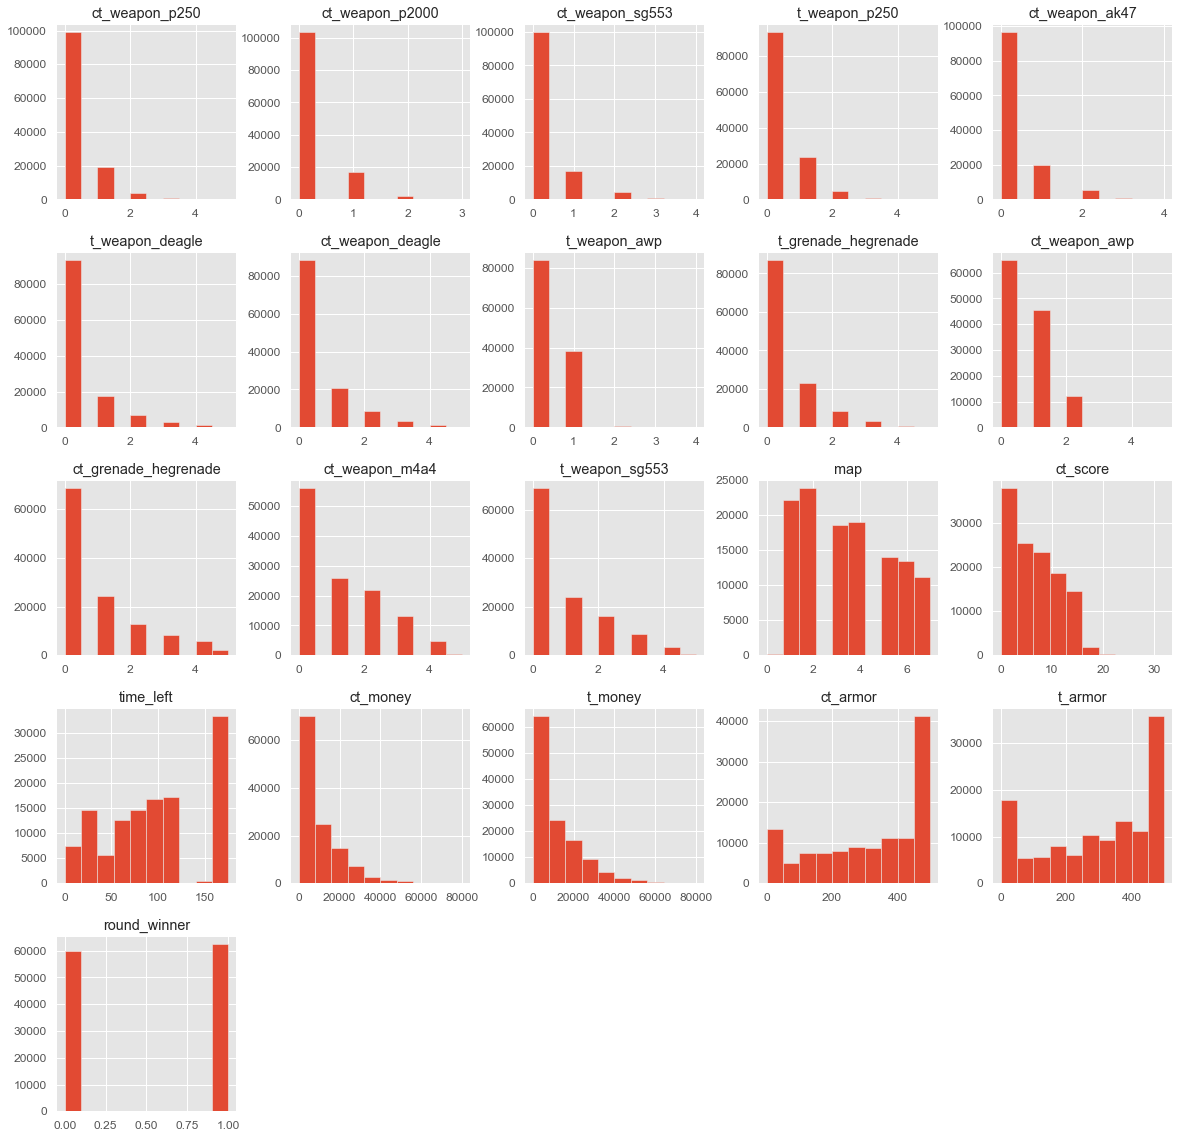

In [38]:
%matplotlib inline
ds_valuable.hist(figsize=(20,20))
plt.show()

In [39]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense

KeyboardInterrupt: 

In [ ]:
ds_x=ds_valuable.drop(target_feature,axis=1)
ds_y=ds_valuable[target_feature]
X_train0, X_test0, y_train0, y_test0 = train_test_split(ds_x,ds_y, random_state=42,stratify=ds_y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train0)
X_train1 = scaler.transform(X_train0)
X_test1 = scaler.transform(X_test0)

In [ ]:

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(21,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train1, y_train0,epochs=8, batch_size=1, verbose=1)

In [ ]:
y_pred = model.predict(X_test0)
score = model.evaluate(X_test0, y_test,verbose=1)
print(score)